Test accuracy for learning rate 0.1: 96.78249678249678%
Test accuracy for learning rate 0.01: 97.29729729729729%
Test accuracy for learning rate 0.001: 94.33719433719433%
Test accuracy for learning rate 0.0001: 84.42728442728443%


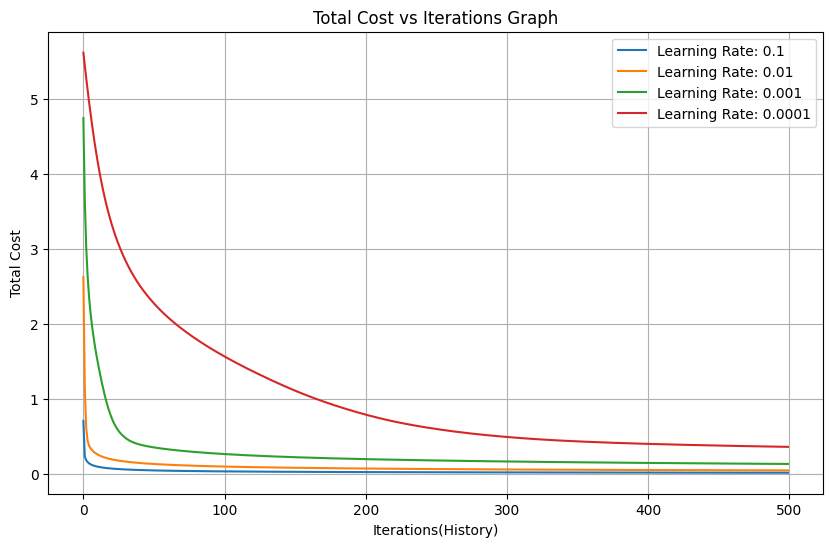

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 06/emails.csv')

dataset_cleaned = dataset.drop(columns=['Email No.'])

X = dataset_cleaned.iloc[:, :-1].values
y = dataset_cleaned.iloc[:, -1].values

X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

def train_val_test_split(X, y, train_ratio=0.7, value_ratio=0.15):
    index = np.arange(X.shape[0])
    np.random.shuffle(index)
    X = X[index]
    y = y[index]

    train_size = int(train_ratio * X.shape[0])
    value_size = int(value_ratio * X.shape[0])

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_value = X[train_size:train_size + value_size]
    y_value = y[train_size:train_size + value_size]
    X_test = X[train_size + value_size:]
    y_test = y[train_size + value_size:]

    return X_train, y_train, X_value, y_value, X_test, y_test

X_train, y_train, X_value, y_value, X_test, y_test = train_val_test_split(X_normalized, y)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X_train, y_train, lr, max_iter):
    X_train_bias = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)

    theta = np.random.rand(X_train_bias.shape[1])
    history = []

    for itr in range(max_iter):
        total_cost = 0
        for i in range(X_train_bias.shape[0]):
            z = np.dot(X_train_bias[i], theta)
            h = sigmoid(z)

            h = np.clip(h, 1e-10, 1 - 1e-10)

            J = -y_train[i] * np.log(h) - (1 - y_train[i]) * np.log(1 - h)
            total_cost += J

            dv = np.dot(X_train_bias[i], (h - y_train[i]))
            theta -= lr * dv

        total_cost /= X_train_bias.shape[0]
        history.append(total_cost)

    return theta, history

def validate(X_val, y_val, theta):
    X_val_bias = np.concatenate((X_val, np.ones((X_val.shape[0], 1))), axis=1)

    correct = 0
    for i in range(X_val_bias.shape[0]):
        z = np.dot(X_val_bias[i], theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0
        if h == y_val[i]:
            correct += 1

    val_acc = correct * 100 / X_val_bias.shape[0]
    return val_acc

def test(X_test, y_test, theta):
    X_test_bias = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

    correct = 0
    for i in range(X_test_bias.shape[0]):
        z = np.dot(X_test_bias[i], theta)
        h = sigmoid(z)
        h = 1 if h >= 0.5 else 0
        if h == y_test[i].astype(int):
            correct += 1

    test_acc = correct * 100 / X_test_bias.shape[0]
    return test_acc

lr_values = [0.1, 0.01, 0.001, 0.0001]
max_iter = 500
history_dict = {}
test_acc_dict = {}

for lr in lr_values:
    theta, history = train_logistic_regression(X_train, y_train, lr, max_iter)
    history_dict[lr] = history
    test_acc = test(X_test, y_test, theta)
    test_acc_dict[lr] = test_acc
    print(f"Test accuracy for learning rate {lr}: {test_acc}%")

plt.figure(figsize=(10, 6))
for lr in lr_values:
    plt.plot(history_dict[lr], label=f'Learning Rate: {lr}')
plt.title('Total Cost vs Iterations Graph')
plt.xlabel('Iterations(History)')
plt.ylabel('Total Cost')
plt.legend()
plt.grid(True)
plt.show()